In [1]:
%matplotlib notebook
import numpy as np
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
filename = 'doi_10.6085_AA_HMS001_020ADCP019R00_20091216.40.1.txt'
df = pd.read_csv(filename, na_values = 9999, delimiter=' ',)

#print(df.head())

Citation:  Partnership for Interdisciplinary Studies of Coastal Oceans (PISCO) and Margaret McManus. 2010. PISCO: Physical Oceanography: bottom-mounted ADCP data: Hopkins Marine Station, California, USA (HMS001). urn:node:PISCO. doi:10.6085/AA/HMS001_020ADCP019R00_20091216.50.1. 


Units and descriptions from metadata:

height: meters - the height of the velocity, temperature, or pressure measurement, in meters above the sea bottom

depth: meters - the depth of the velocity, temperature, or pressure measurement, in positive meters below Mean Sea Level (MSL). Bins above MSL are represented with negative depths

waterdepth: meters - the fluctuating water depth (sea floor to sea surface distance) at the measurement site, in meters, as determined by location of sea surface from ADCP pressure measurements, or if pressure is unavailable, the maximum in ADCP echo intensity

temp_c: celsius - seawater temperature from ADCP sensor

pressure: decibars - pressure measured at the ADCP sensor, measured in decibars with a precision defined as the effective resolution of the instrument

intensity: ADCP echo intensity (or backscatter), in RDI counts. This value represents the average of all 4 beams, rounded to the nearest whole number

data_quality:  post-processing quantitative data quality indicator. Specifically, RDI percent-good #4, in earth coordinates (percentage of successful 4-beam transformations), expressed as a percentage, 50, 80, 95, etc

eatward: metersPerSecond (precision = .02) - True eastward velocity measurements. Negative values represent westward velocities

northward: metersPerSecond (precision = .02) - True northward velocity measurements. Negative values represent southward velocities

upwards: metersPerSecond  - True upwards velocity measurements. Negative values represent downward velocities

errorvelocity: metersPerSecond - The difference of two vertical velocities, each measured by an opposing pair of ADCP beams

flag: data flag used to qualify data as bad, questionable, etc

In [3]:
#create indecies to ignore all the nans
# east = df['eatward'][np.isfinite(df['eatward'])]
# north = df['northward'][np.isfinite(df['northward'])]
# up = df['upwards'][np.isfinite(df['upwards'])]

In [4]:
# direction = [east,north,up]
# plt.figure()
# plotnum = 0

# for var in direction:
#     plotnum = plotnum+1
#     plt.subplot(1,3,plotnum)
#     if plotnum == 1:
#         plt.plot(var,df['height'][np.isfinite(df['eatward'])],'.')
#         plt.ylabel('Height above ADCP')
#         plt.xlabel('Eastward')
#     if plotnum == 2:
#         plt.plot(var,df['height'][np.isfinite(df['northward'])],'.')
#         plt.xlabel('Northward')
#         plt.title('Water Velocity Measurements [m/s]')
#     if plotnum == 3:
#         plt.plot(var,df['height'][np.isfinite(df['upwards'])],'.')
#         plt.xlabel('Upward')

In [5]:
# plotnum = 0

# for var in direction:
# plotnum = plotnum+1
#     plt.figure()
#     if plotnum == 1:
#         plt.plot(df['yearday'][np.isfinite(df['eatward'])],var,'.')
#         plt.ylabel('Eastward')
#         plt.xlabel('Yearday')
#     if plotnum == 2:
#         plt.plot(df['yearday'][np.isfinite(df['northward'])],var,'.')
#         plt.ylabel('Northward')
#         plt.title('Water Velocity Measurements [m/s]')
#         plt.xlabel('Yearday')
#     if plotnum == 3:
#         plt.plot(df['yearday'][np.isfinite(df['upwards'])],var,'.')
#         plt.ylabel('Upward')
#         plt.xlabel('Yearday')
#         plt.tight_layout()

In [6]:
#check that reshape fills entire rows before columns
test = [1,2,3,4,5,6]
np.reshape(test,(3,2))

array([[1, 2],
       [3, 4],
       [5, 6]])

C:\Users\Miya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


<IPython.core.display.Javascript object>


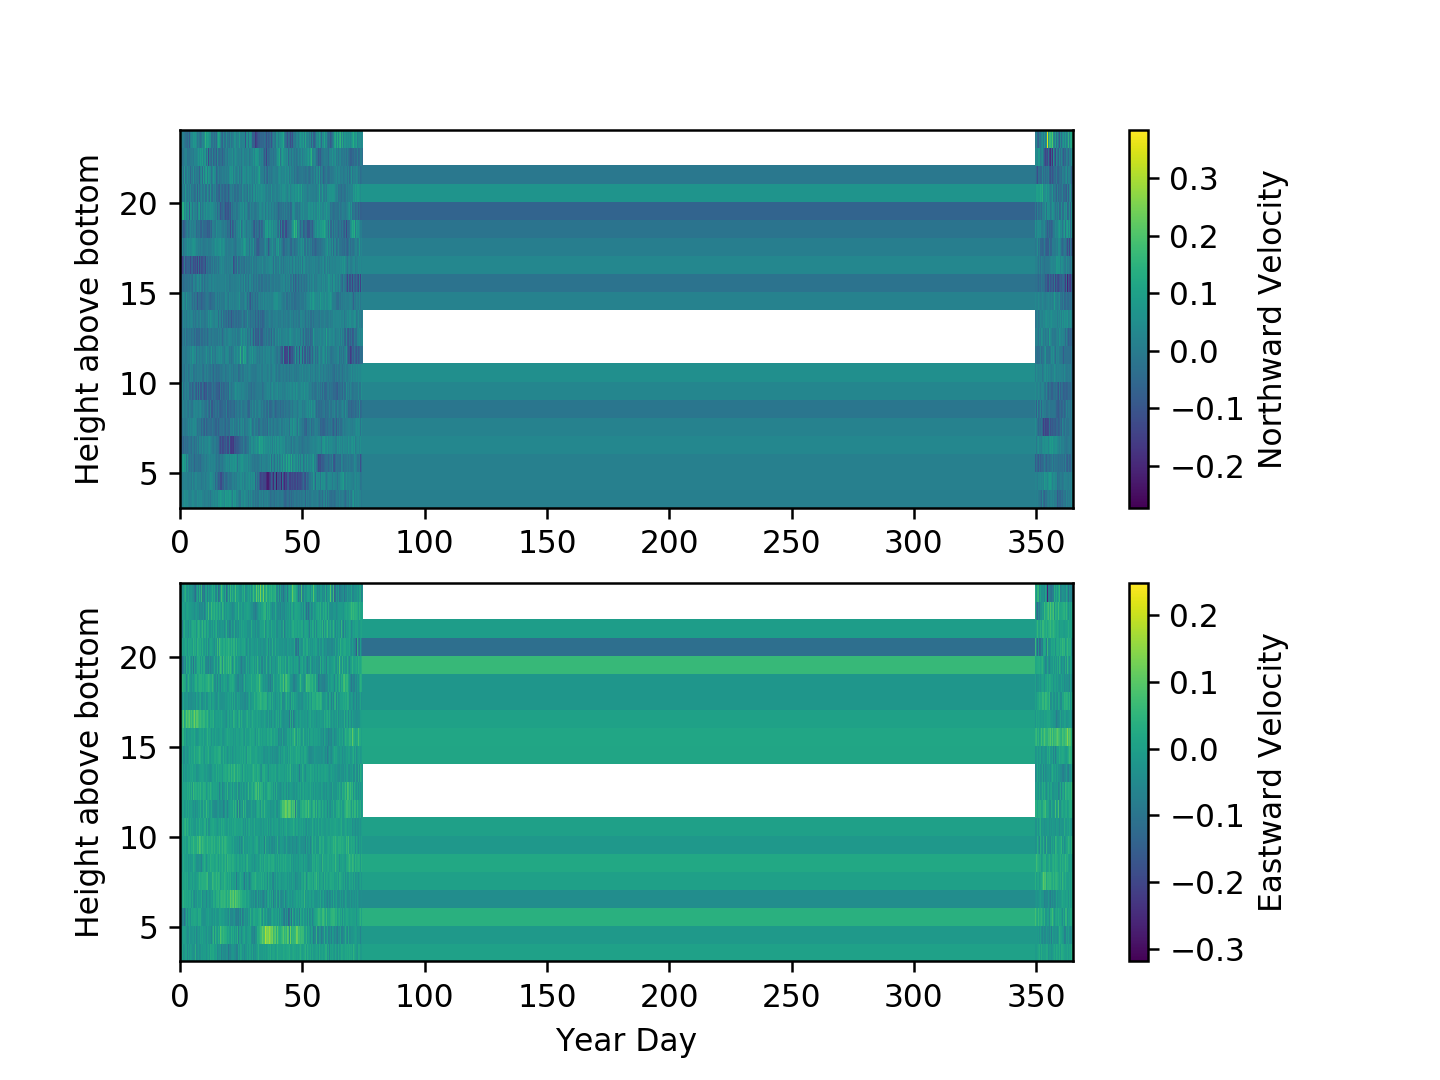

In [17]:
#plot northward and eastward velocities
unique_yearday = np.unique(df['yearday'])
unique_height = np.unique(df['height'])
reshape_northward = np.reshape((df['northward']),(len(unique_height),len(unique_yearday))) #this seems backwards?
reshape_eastward = np.reshape((df['eatward']),(len(unique_height),len(unique_yearday)))

plt.figure()
plt.subplot(2,1,1)
plt.pcolormesh(unique_yearday,unique_height,reshape_northward)
plt.colorbar(label='Northward Velocity')
plt.ylabel('Height above bottom')

plt.subplot(2,1,2)
plt.pcolormesh(unique_yearday,unique_height,reshape_eastward)
plt.colorbar(label='Eastward Velocity')
plt.ylabel('Height above bottom')
plt.xlabel('Year Day');


C:\Users\Miya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


<IPython.core.display.Javascript object>


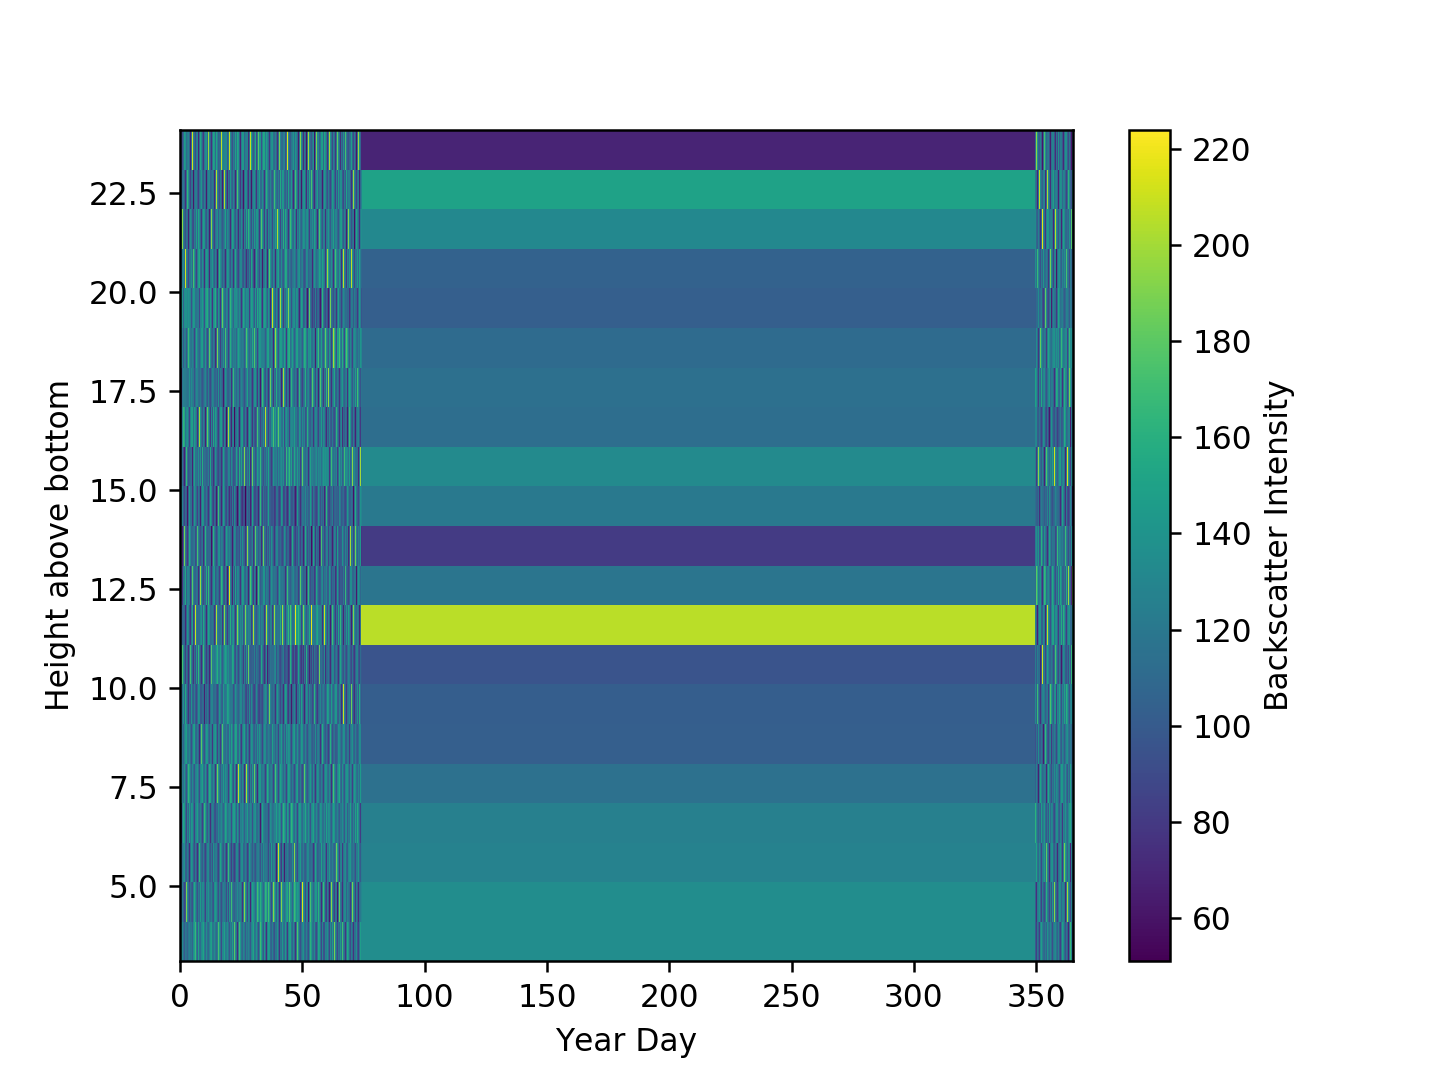

In [18]:
#plot backscatter intensity
reshape_intensity= np.reshape((df['intensity']),(len(unique_height),len(unique_yearday)))

plt.figure()
plt.pcolormesh(unique_yearday,unique_height,reshape_intensity)
plt.colorbar(label='Backscatter Intensity')
plt.ylabel('Height above bottom')
plt.xlabel('Year Day');
